Import the required library

In [13]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
import matplotlib.pyplot as plt

Read the data from the file.

In [14]:
# load dataset without PCA

npca_X_test = pd.read_csv('data/impv/without_pca/X_test.csv')
npca_X_train = pd.read_csv('data/impv/without_pca/X_train.csv').values
npca_y_test = pd.read_csv('data/impv/without_pca/y_test.csv').values
npca_y_train = pd.read_csv('data/impv/without_pca/y_train.csv').values
column_name = list(npca_X_test.columns)
npca_X_test = npca_X_test.values 
# load dataset After PCA
X_test = pd.read_csv('data/impv/X_test.csv').values
X_train = pd.read_csv('data/impv/X_train.csv').values
y_test = pd.read_csv('data/impv/y_test.csv').values
y_train = pd.read_csv('data/impv/y_train.csv').values

## Machine Learning

In [15]:
def CallRF(X_train, X_test, y_train, y_test, param = None):
    if param is None:
        rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
    else:
        rf = RandomForestRegressor(
            n_estimators = param["n_estimators"],
            min_samples_split = param["min_samples_split"],
            min_samples_leaf = param["min_samples_leaf"],
            max_features = param["max_features"],
            max_depth = param["max_depth"],
            bootstrap = param["bootstrap"]
        )
    rf.fit(X_train, y_train.ravel())
    predictions = rf.predict(X_test)
    
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
    print('\nMean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
    print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, predictions))
    
    
    
    #print('Accuracy:', round(100*(1 - mape), 2))
    
    train_score = rf.score(X_train,y_train)
    test_score = rf.score(X_test,y_test)
    print(f'\nTrain Score: {train_score} \t\t Test Score: {test_score}')
    
    y_pred_rf1 = pd.DataFrame( { "actual": y_test.ravel(), "predicted_prob": rf.predict(X_test) } ) 
    print(y_pred_rf1.head(10))
    
    
    
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, predictions, s=20)
    plt.title('Predicted vs. Actual')
    plt.xlabel('Actual Life Expectancy at Birth')
    plt.ylabel('Predicted Life Expectancy at Birth')

    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
    plt.tight_layout()
    
    return rf

Mean Absolute Error: 0.7765995157459821

Mean Squared Error: 1.588502781276441

Root Mean Squared Error: 1.260358195623943
Mean Absolute Percentage Error (MAPE): 0.011562458311902623

Train Score: 0.9959093528562728 		 Test Score: 0.9826355879758523
   actual  predicted_prob
0  72.299       72.325080
1  54.557       55.678823
2  83.200       83.243000
3  62.117       61.280591
4  50.592       50.702075
5  53.673       55.422150
6  73.145       73.313570
7  64.282       64.412830
8  71.551       70.758478
9  58.174       57.486201
Wall time: 16.4 s


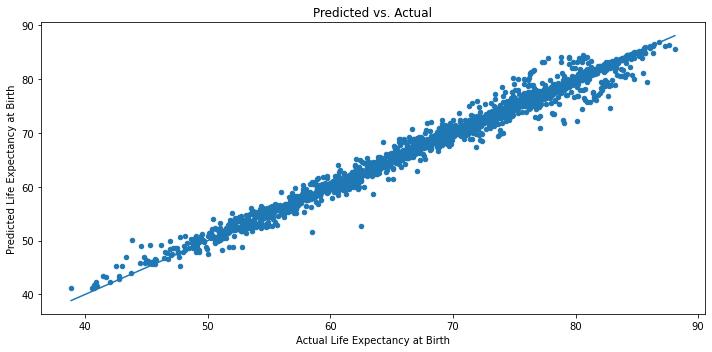

In [16]:
%%time
rfmodel1 = CallRF(npca_X_train, npca_X_test, npca_y_train, npca_y_test)

Mean Absolute Error: 1.2460337617306556

Mean Squared Error: 3.1478674973967933

Root Mean Squared Error: 1.7742230686688731
Mean Absolute Percentage Error (MAPE): 0.018511990031911278

Train Score: 0.9934133980263935 		 Test Score: 0.9655896930955966
   actual  predicted_prob
0  72.299       72.041150
1  54.557       54.422883
2  83.200       83.267510
3  62.117       60.066615
4  50.592       56.415500
5  53.673       53.304953
6  73.145       73.110770
7  64.282       65.859182
8  71.551       71.269257
9  58.174       57.515250
Wall time: 11.1 s


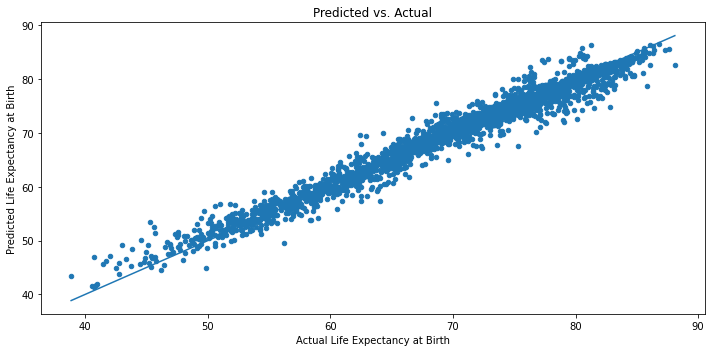

In [17]:
%%time
rfmodel2 = CallRF(X_train, X_test, y_train, y_test)

## Hyperparameter tuning using RandomizedSearchCV

In [18]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [19]:
def CallRandomizedSearch(X_train, y_train):
    rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(),param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
    rf_random.fit(X_train, y_train.ravel())

    #print ('Random grid: ', random_grid, '\n')
    # print the best parameters
    print ('Best Parameters: ', rf_random.best_params_, ' \n')
    return rf_random.best_params_

In [20]:
%%time
npca_param = CallRandomizedSearch(npca_X_train, npca_y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}  

Wall time: 3min 29s


In [21]:
%%time
param = CallRandomizedSearch(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}  

Wall time: 2min 36s


## Using the best parameters

Mean Absolute Error: 0.7645556955128701

Mean Squared Error: 1.413915824757689

Root Mean Squared Error: 1.1890819251665081
Mean Absolute Percentage Error (MAPE): 0.011215059900287835

Train Score: 0.9954095699370948 		 Test Score: 0.9845440516453949
   actual  predicted_prob
0  72.299       72.526170
1  54.557       55.012192
2  83.200       83.170800
3  62.117       61.172131
4  50.592       52.372688
5  53.673       53.780048
6  73.145       73.175396
7  64.282       64.607226
8  71.551       71.428491
9  58.174       58.114372
Wall time: 5.99 s


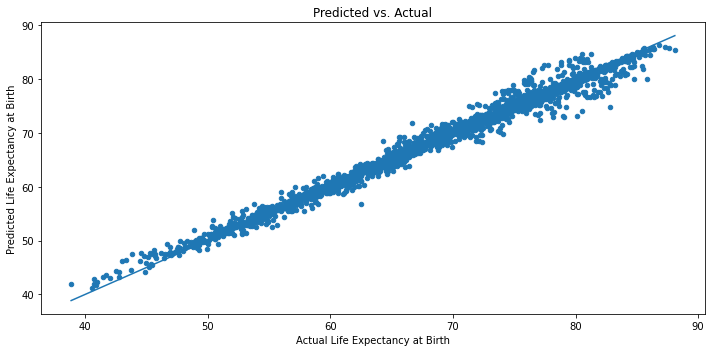

In [22]:
%%time
rfmodel3 = CallRF(npca_X_train, npca_X_test, npca_y_train, npca_y_test, npca_param)

Mean Absolute Error: 1.2404484927348916

Mean Squared Error: 3.150570395446739

Root Mean Squared Error: 1.7749846183690547
Mean Absolute Percentage Error (MAPE): 0.018417129454753385

Train Score: 0.9947387800876397 		 Test Score: 0.9655601468864544
   actual  predicted_prob
0  72.299       71.992651
1  54.557       54.753345
2  83.200       83.280262
3  62.117       60.564334
4  50.592       56.739163
5  53.673       53.113254
6  73.145       73.340820
7  64.282       65.539611
8  71.551       71.554842
9  58.174       58.193095
Wall time: 6.32 s


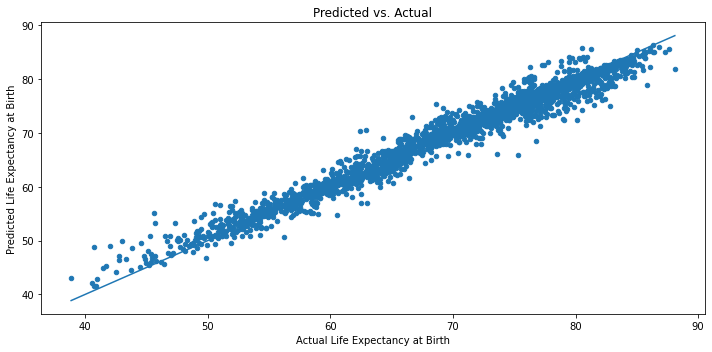

In [23]:
%%time
rfmodel4 = CallRF(X_train, X_test, y_train, y_test, param)

### Let's view the impact of features on best performing model

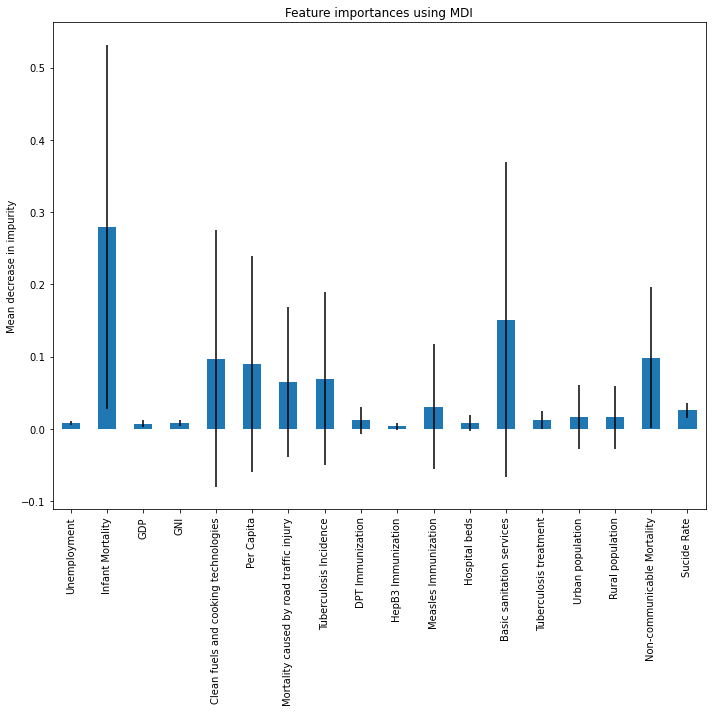

In [24]:
importances = rfmodel3.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfmodel3.estimators_], axis=0)

forest_importances = pd.Series(importances, index=column_name)

fig, ax = plt.subplots(figsize = (10, 10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()